# 2. Data Understanding - Análise Exploratória de Dados

## Aviso Educacional
Este conteúdo é destinado apenas para fins educacionais. Os dados exibidos são ilustrativos e podem não corresponder a situações reais.

---

## Objetivo
Realizar uma análise exploratória profunda do mercado automotivo brasileiro, identificando padrões, anomalias e insights que guiarão as próximas fases do CRISP-DM.

### Metodologia CRISP-DM - Fase 2: Data Understanding
1. **Coleta inicial de dados** ✅
2. **Descrição dos dados** ⏳ (Esta etapa)
3. **Exploração dos dados** ⏳ (Esta etapa) 
4. **Verificação da qualidade** ⏳ (Esta etapa)

## 1. Setup e Configuração

In [22]:
# Importações principais
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Análise estatística
from scipy import stats
from scipy.stats import normaltest, shapiro, kstest
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Utilitários
import warnings
import json
from datetime import datetime
from pathlib import Path

# Módulo personalizado
from data.load_data import DataLoader, load_car_dataset

warnings.filterwarnings('ignore')

# Configurações de visualização profissional
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")

# Configurações do matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Configurações do plotly
import plotly.io as pio
pio.templates.default = "plotly_white"

print(" Setup concluído!")
print(f"Python: {sys.version}")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")

 Setup concluído!
Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Pandas: 2.3.1
NumPy: 2.2.6


## 2. Carregamento e Inspeção Inicial

In [23]:
# Carregamento usando nosso DataLoader personalizado
file_path = '../data/raw/dataset_carros_brasil.csv'

print(" Carregando dataset usando DataLoader personalizado...")
df, quality_report = load_car_dataset(file_path)

print(f" Dataset carregado com sucesso!")
print(f" Dimensões: {df.shape}")
print(f" Memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f" Carregado em: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

2025-09-28 18:05:26,604 - data.load_data - INFO - DataLoader inicializado com sucesso
2025-09-28 18:05:26,612 - data.load_data - INFO - Iniciando carregamento do dataset: ../data/raw/dataset_carros_brasil.csv
2025-09-28 18:05:26,628 - data.load_data - INFO - Dataset encontrado no cache, carregando...
2025-09-28 18:05:26,722 - data.load_data - INFO - Dataset carregado do cache: (10000, 9)
2025-09-28 18:05:26,725 - data.load_data - INFO - Gerando relatório de qualidade dos dados...


 Carregando dataset usando DataLoader personalizado...


2025-09-28 18:05:27,025 - data.load_data - INFO - Relatório de qualidade gerado com sucesso
2025-09-28 18:05:27,027 - data.load_data - INFO - Detectando anomalias específicas do mercado automotivo...
2025-09-28 18:05:27,072 - data.load_data - INFO - Detecção de anomalias concluída: 2 anomalias encontradas


 Dataset carregado com sucesso!
 Dimensões: (10000, 9)
 Memória: 3.07 MB
 Carregado em: 2025-09-28 18:05:27


In [24]:
# Informações básicas do dataset
print("=== INFORMAÇÕES GERAIS DO DATASET ===")
print(f"Número de linhas: {df.shape[0]:,}")
print(f"Número de colunas: {df.shape[1]}")
print(f"\nColunas: {list(df.columns)}")

print("\n=== TIPOS DE DADOS ===")
info_df = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo': df.dtypes,
    'Não-Nulos': df.count(),
    'Nulos': df.isnull().sum(),
    'Únicos': df.nunique(),
    '% Únicos': (df.nunique() / len(df) * 100).round(2)
})
display(info_df)

print("\n=== PRIMEIRAS 5 LINHAS ===")
display(df.head())

=== INFORMAÇÕES GERAIS DO DATASET ===
Número de linhas: 10,000
Número de colunas: 9

Colunas: ['Marca', 'Modelo', 'Ano', 'Quilometragem', 'Cor', 'Cambio', 'Combustivel', 'Portas', 'Valor_Venda']

=== TIPOS DE DADOS ===


,Coluna,Tipo,Não-Nulos,Nulos,Únicos,% Únicos
Marca,Marca,object,10000,0,10,0.10
Modelo,Modelo,object,10000,0,32,0.32
Ano,Ano,float64,9900,100,24,0.24
Quilometragem,Quilometragem,float64,9900,100,9652,96.52
Cor,Cor,object,10000,0,6,0.06
Cambio,Cambio,object,10000,0,2,0.02
Combustivel,Combustivel,object,10000,0,3,0.03
Portas,Portas,int64,10000,0,2,0.02
Valor_Venda,Valor_Venda,float64,10000,0,9672,96.72



=== PRIMEIRAS 5 LINHAS ===


,Marca,Modelo,Ano,Quilometragem,Cor,Cambio,Combustivel,Portas,Valor_Venda
0,Ford,EcoSport,2003.00,82624.00,Azul,Automático,Flex,4,52604.20
1,Hyundai,HB20S,2017.00,69260.00,Azul,Automático,Diesel,2,63219.00
2,Jeep,Renegade,2008.00,106493.00,Cinza,Manual,Gasolina,2,79710.40
3,Toyota,Corolla,2018.00,53570.00,Prata,Automático,Flex,2,99149.00
4,Ford,Ranger,2009.00,21643.00,Prata,Manual,Flex,2,68913.40


## 3. Análise de Qualidade dos Dados

In [25]:
# Relatório de qualidade automático
print("=== RELATÓRIO DE QUALIDADE AUTOMÁTICO ===")
print(f"Timestamp: {quality_report['timestamp']}")
print(f"\n Informações do Dataset:")
for key, value in quality_report['dataset_info'].items():
    print(f"  {key}: {value}")

print(f"\n Qualidade dos Dados:")
print(f"  Duplicatas: {quality_report['data_quality']['duplicates']}")
print(f"  Valores ausentes por coluna:")
for col, missing in quality_report['data_quality']['missing_values'].items():
    if missing > 0:
        print(f"    {col}: {missing} ({missing/len(df)*100:.2f}%)")

if all(v == 0 for v in quality_report['data_quality']['missing_values'].values()):
    print(" Nenhum valor ausente detectado!")

=== RELATÓRIO DE QUALIDADE AUTOMÁTICO ===
Timestamp: 2025-09-28T18:05:26.728431

 Informações do Dataset:
  shape: (10000, 9)
  memory_usage_mb: 3.015763282775879
  columns: ['Marca', 'Modelo', 'Ano', 'Quilometragem', 'Cor', 'Cambio', 'Combustivel', 'Portas', 'Valor_Venda']

 Qualidade dos Dados:
  Duplicatas: 0
  Valores ausentes por coluna:
    Ano: 100 (1.00%)
    Quilometragem: 100 (1.00%)


In [26]:
# Detecção de anomalias específicas do mercado automotivo
print("=== DETECÇÃO DE ANOMALIAS ESPECÍFICAS ===")
anomalies = quality_report['anomalies']

total_anomalies = sum(len(v) for v in anomalies.values())
print(f"Total de tipos de anomalias detectadas: {total_anomalies}")

for category, issues in anomalies.items():
    if issues:
        print(f"\n {category.replace('_', ' ').title()}:")
        for issue in issues:
            print(f"  • {issue}")
    else:
        print(f"\n {category.replace('_', ' ').title()}: Nenhuma anomalia detectada")

=== DETECÇÃO DE ANOMALIAS ESPECÍFICAS ===
Total de tipos de anomalias detectadas: 2

 Temporal Anomalies: Nenhuma anomalia detectada

 Business Logic Anomalies:
  • 992 carros antigos com baixa quilometragem
  • 200 carros com preços muito altos (>R$300k)

 Statistical Anomalies: Nenhuma anomalia detectada

 Data Quality Issues: Nenhuma anomalia detectada


## 4. Análise Estatística Descritiva

In [27]:
# Estatísticas descritivas para variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"=== ANÁLISE DE VARIÁVEIS NUMÉRICAS ({len(numeric_cols)} variáveis) ===")
print(f"Variáveis: {numeric_cols}")

# Estatísticas básicas
desc_stats = df[numeric_cols].describe()
display(desc_stats)

# Estatísticas adicionais
print("\n=== ESTATÍSTICAS ADICIONAIS ===")
additional_stats = pd.DataFrame({
    'Assimetria': df[numeric_cols].skew(),
    'Curtose': df[numeric_cols].kurtosis(),
    'Coef_Variação': (df[numeric_cols].std() / df[numeric_cols].mean()) * 100
})
display(additional_stats.round(3))

=== ANÁLISE DE VARIÁVEIS NUMÉRICAS (4 variáveis) ===
Variáveis: ['Ano', 'Quilometragem', 'Portas', 'Valor_Venda']


,Ano,Quilometragem,Portas,Valor_Venda
count,9900.00,9900.00,10000.00,10000.00
mean,2011.52,99805.34,3.01,83097.49
std,6.90,57760.42,1.00,166858.22
min,2000.00,10.00,2.00,10000.00
25%,2006.00,50712.75,2.00,44467.05
50%,2012.00,99751.00,4.00,58905.70
75%,2017.00,149429.75,4.00,74804.40
max,2023.00,199994.00,4.00,1241962.00



=== ESTATÍSTICAS ADICIONAIS ===


,Assimetria,Curtose,Coef_Variação
Ano,-0.01,-1.20,0.34
Quilometragem,-0.00,-1.19,57.87
Portas,-0.02,-2.00,33.24
Valor_Venda,6.69,43.57,200.80


In [28]:
# Testes de normalidade
print("=== TESTES DE NORMALIDADE ===")
normality_results = []

for col in numeric_cols:
    # Teste de Shapiro-Wilk (para amostras pequenas)
    if len(df[col].dropna()) <= 5000:
        stat_sw, p_sw = shapiro(df[col].dropna().sample(min(5000, len(df[col].dropna()))))
        is_normal_sw = p_sw > 0.05
    else:
        stat_sw, p_sw, is_normal_sw = np.nan, np.nan, "N/A"
    
    # Teste de D'Agostino-Pearson
    stat_dp, p_dp = normaltest(df[col].dropna())
    is_normal_dp = p_dp > 0.05
    
    normality_results.append({
        'Variável': col,
        'Shapiro_p': p_sw,
        'Normal_Shapiro': is_normal_sw,
        'DAgostino_p': p_dp,
        'Normal_DAgostino': is_normal_dp
    })

normality_df = pd.DataFrame(normality_results)
display(normality_df)

=== TESTES DE NORMALIDADE ===


,Variável,Shapiro_p,Normal_Shapiro,DAgostino_p,Normal_DAgostino
0,Ano,NaN,N/A,0.00,False
1,Quilometragem,NaN,N/A,0.00,False
2,Portas,NaN,N/A,0.00,False
3,Valor_Venda,NaN,N/A,0.00,False


In [29]:
# Análise de variáveis categóricas
print(f"=== ANÁLISE DE VARIÁVEIS CATEGÓRICAS ({len(categorical_cols)} variáveis) ===")
print(f"Variáveis: {categorical_cols}")

for col in categorical_cols:
    print(f"\n {col.upper()}:")
    value_counts = df[col].value_counts()
    print(f"  Valores únicos: {df[col].nunique()}")
    print(f"  Valor mais frequente: {value_counts.index[0]} ({value_counts.iloc[0]} ocorrências)")
    print(f"  Top 5 valores:")
    for idx, (value, count) in enumerate(value_counts.head(5).items()):
        percentage = (count / len(df)) * 100
        print(f"    {idx+1}. {value}: {count} ({percentage:.1f}%)")

=== ANÁLISE DE VARIÁVEIS CATEGÓRICAS (5 variáveis) ===
Variáveis: ['Marca', 'Modelo', 'Cor', 'Cambio', 'Combustivel']

 MARCA:
  Valores únicos: 10
  Valor mais frequente: Volkswagen (1053 ocorrências)
  Top 5 valores:
    1. Volkswagen: 1053 (10.5%)
    2. Nissan: 1034 (10.3%)
    3. Honda: 1021 (10.2%)
    4. Ford: 1017 (10.2%)
    5. Fiat: 996 (10.0%)

 MODELO:
  Valores únicos: 32
  Valor mais frequente: Compass (493 ocorrências)
  Top 5 valores:
    1. Compass: 493 (4.9%)
    2. Renegade: 474 (4.7%)
    3. Frontier: 363 (3.6%)
    4. Kicks: 358 (3.6%)
    5. Duster: 355 (3.5%)

 COR:
  Valores únicos: 6
  Valor mais frequente: Azul (1739 ocorrências)
  Top 5 valores:
    1. Azul: 1739 (17.4%)
    2. Cinza: 1720 (17.2%)
    3. Preto: 1700 (17.0%)
    4. Branco: 1652 (16.5%)
    5. Vermelho: 1599 (16.0%)

 CAMBIO:
  Valores únicos: 2
  Valor mais frequente: Automático (5051 ocorrências)
  Top 5 valores:
    1. Automático: 5051 (50.5%)
    2. Manual: 4949 (49.5%)

 COMBUSTIVEL:
  Val

## 5. Análise da Variável Target (Valor_Venda)

In [30]:
# Análise profunda da variável target
target = 'Valor_Venda'

print(f"=== ANÁLISE DETALHADA DA VARIÁVEL TARGET: {target} ===")

# Estatísticas centrais
mean_price = df[target].mean()
median_price = df[target].median()
std_price = df[target].std()
min_price = df[target].min()
max_price = df[target].max()

print(f" Estatísticas Centrais:")
print(f"  Média: R$ {mean_price:,.2f}")
print(f"  Mediana: R$ {median_price:,.2f}")
print(f"  Diferença Média-Mediana: R$ {abs(mean_price - median_price):,.2f}")
print(f"  Desvio Padrão: R$ {std_price:,.2f}")
print(f"  Coeficiente de Variação: {(std_price/mean_price)*100:.1f}%")

print(f"\n Extremos:")
print(f"  Valor Mínimo: R$ {min_price:,.2f}")
print(f"  Valor Máximo: R$ {max_price:,.2f}")
print(f"  Amplitude: R$ {max_price - min_price:,.2f}")

# Quartis e percentis
print(f"\n Distribuição (Quartis):")
quartiles = df[target].quantile([0.25, 0.5, 0.75])
for q, value in quartiles.items():
    print(f"  Q{int(q*4)} ({q*100:.0f}%): R$ {value:,.2f}")

print(f"\n Percentis Específicos:")
percentiles = [0.1, 0.9, 0.95, 0.99]
for p in percentiles:
    value = df[target].quantile(p)
    print(f"  P{int(p*100)}: R$ {value:,.2f}")

=== ANÁLISE DETALHADA DA VARIÁVEL TARGET: Valor_Venda ===
 Estatísticas Centrais:
  Média: R$ 83,097.49
  Mediana: R$ 58,905.70
  Diferença Média-Mediana: R$ 24,191.79
  Desvio Padrão: R$ 166,858.22
  Coeficiente de Variação: 200.8%

 Extremos:
  Valor Mínimo: R$ 10,000.00
  Valor Máximo: R$ 1,241,962.00
  Amplitude: R$ 1,231,962.00

 Distribuição (Quartis):
  Q1 (25%): R$ 44,467.05
  Q2 (50%): R$ 58,905.70
  Q3 (75%): R$ 74,804.40

 Percentis Específicos:
  P10: R$ 33,032.66
  P90: R$ 90,299.10
  P95: R$ 100,878.67
  P99: R$ 1,241,962.00


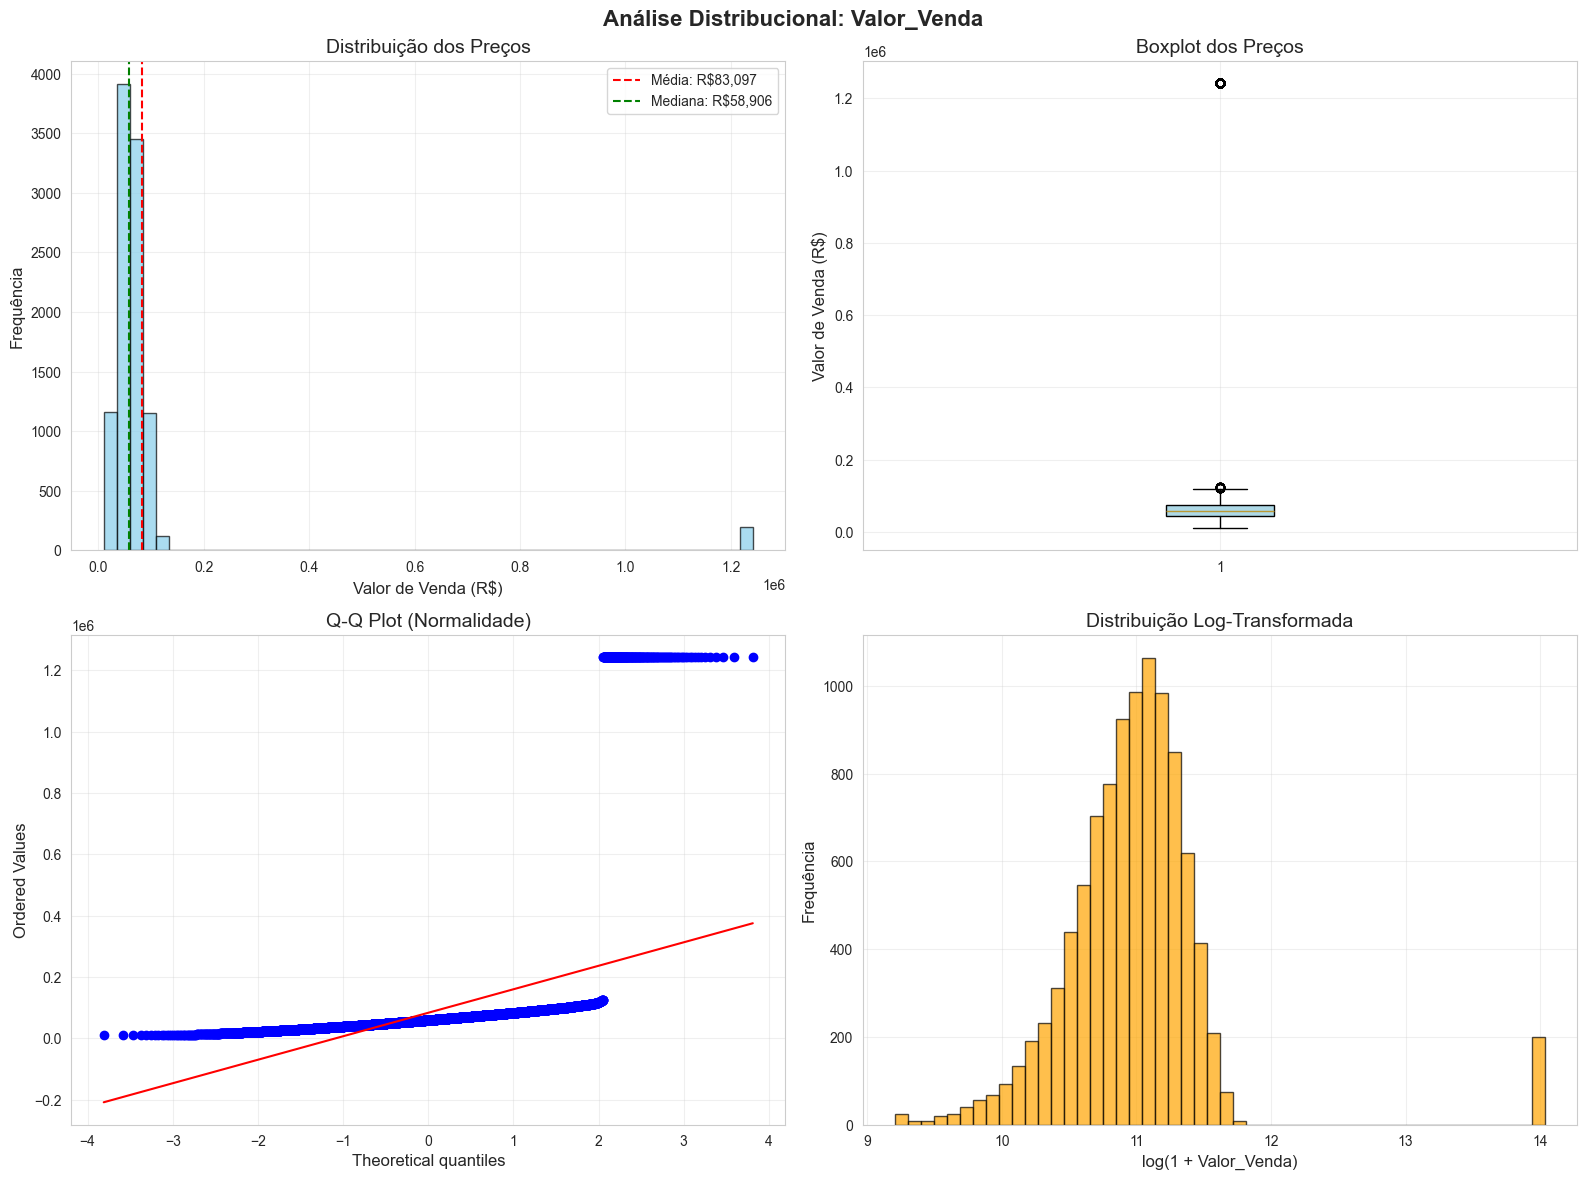


 Características da Distribuição:
  Assimetria: 6.693 (Positiva - cauda à direita)
  Curtose: 43.568 (Leptocúrtica - mais pontiaguda)


In [31]:
# Visualização da distribuição da variável target
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Análise Distribucional: {target}', fontsize=16, fontweight='bold')

# Histograma
axes[0,0].hist(df[target], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(mean_price, color='red', linestyle='--', label=f'Média: R${mean_price:,.0f}')
axes[0,0].axvline(median_price, color='green', linestyle='--', label=f'Mediana: R${median_price:,.0f}')
axes[0,0].set_title('Distribuição dos Preços')
axes[0,0].set_xlabel('Valor de Venda (R$)')
axes[0,0].set_ylabel('Frequência')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Boxplot
bp = axes[0,1].boxplot(df[target], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[0,1].set_title('Boxplot dos Preços')
axes[0,1].set_ylabel('Valor de Venda (R$)')
axes[0,1].grid(True, alpha=0.3)

# Q-Q Plot
stats.probplot(df[target], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot (Normalidade)')
axes[1,0].grid(True, alpha=0.3)

# Distribuição log-transformada
log_prices = np.log1p(df[target])  # log(1+x) para evitar log(0)
axes[1,1].hist(log_prices, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_title('Distribuição Log-Transformada')
axes[1,1].set_xlabel('log(1 + Valor_Venda)')
axes[1,1].set_ylabel('Frequência')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise de assimetria e curtose
skewness = df[target].skew()
kurt = df[target].kurtosis()

print(f"\n Características da Distribuição:")
print(f"  Assimetria: {skewness:.3f} {'(Positiva - cauda à direita)' if skewness > 0 else '(Negativa - cauda à esquerda)' if skewness < 0 else '(Simétrica)'}")
print(f"  Curtose: {kurt:.3f} {'(Leptocúrtica - mais pontiaguda)' if kurt > 0 else '(Platicúrtica - mais achatada)' if kurt < 0 else '(Mesocúrtica - normal)'}")

## 6. Análise de Outliers Multicamada

In [32]:
# Detecção de outliers usando múltiplos métodos
print("=== ANÁLISE DE OUTLIERS MULTICAMADA ===")

def detect_outliers_zscore(data, threshold=3):
    """Detecção usando Z-score"""
    z_scores = np.abs(stats.zscore(data.dropna()))
    return data[z_scores > threshold]

def detect_outliers_iqr(data, factor=1.5):
    """Detecção usando IQR"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

def detect_outliers_isolation_forest(data, contamination=0.1):
    """Detecção usando Isolation Forest"""
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(data.values.reshape(-1, 1))
    return data[outlier_labels == -1]

# Análise para cada variável numérica
outlier_summary = []

for col in numeric_cols:
    data = df[col].dropna()
    
    # Métodos de detecção
    outliers_zscore = detect_outliers_zscore(data)
    outliers_iqr = detect_outliers_iqr(data)
    outliers_iso = detect_outliers_isolation_forest(data)
    
    outlier_summary.append({
        'Variável': col,
        'Z-Score': len(outliers_zscore),
        'IQR': len(outliers_iqr),
        'Isolation_Forest': len(outliers_iso),
        'Z-Score_%': (len(outliers_zscore) / len(data)) * 100,
        'IQR_%': (len(outliers_iqr) / len(data)) * 100,
        'Isolation_%': (len(outliers_iso) / len(data)) * 100
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df.round(2))

=== ANÁLISE DE OUTLIERS MULTICAMADA ===


,Variável,Z-Score,IQR,Isolation_Forest,Z-Score_%,IQR_%,Isolation_%
0,Ano,0,0,814,0.00,0.00,8.22
1,Quilometragem,0,0,990,0.00,0.00,10.00
2,Portas,0,0,0,0.00,0.00,0.00
3,Valor_Venda,200,217,996,2.00,2.17,9.96


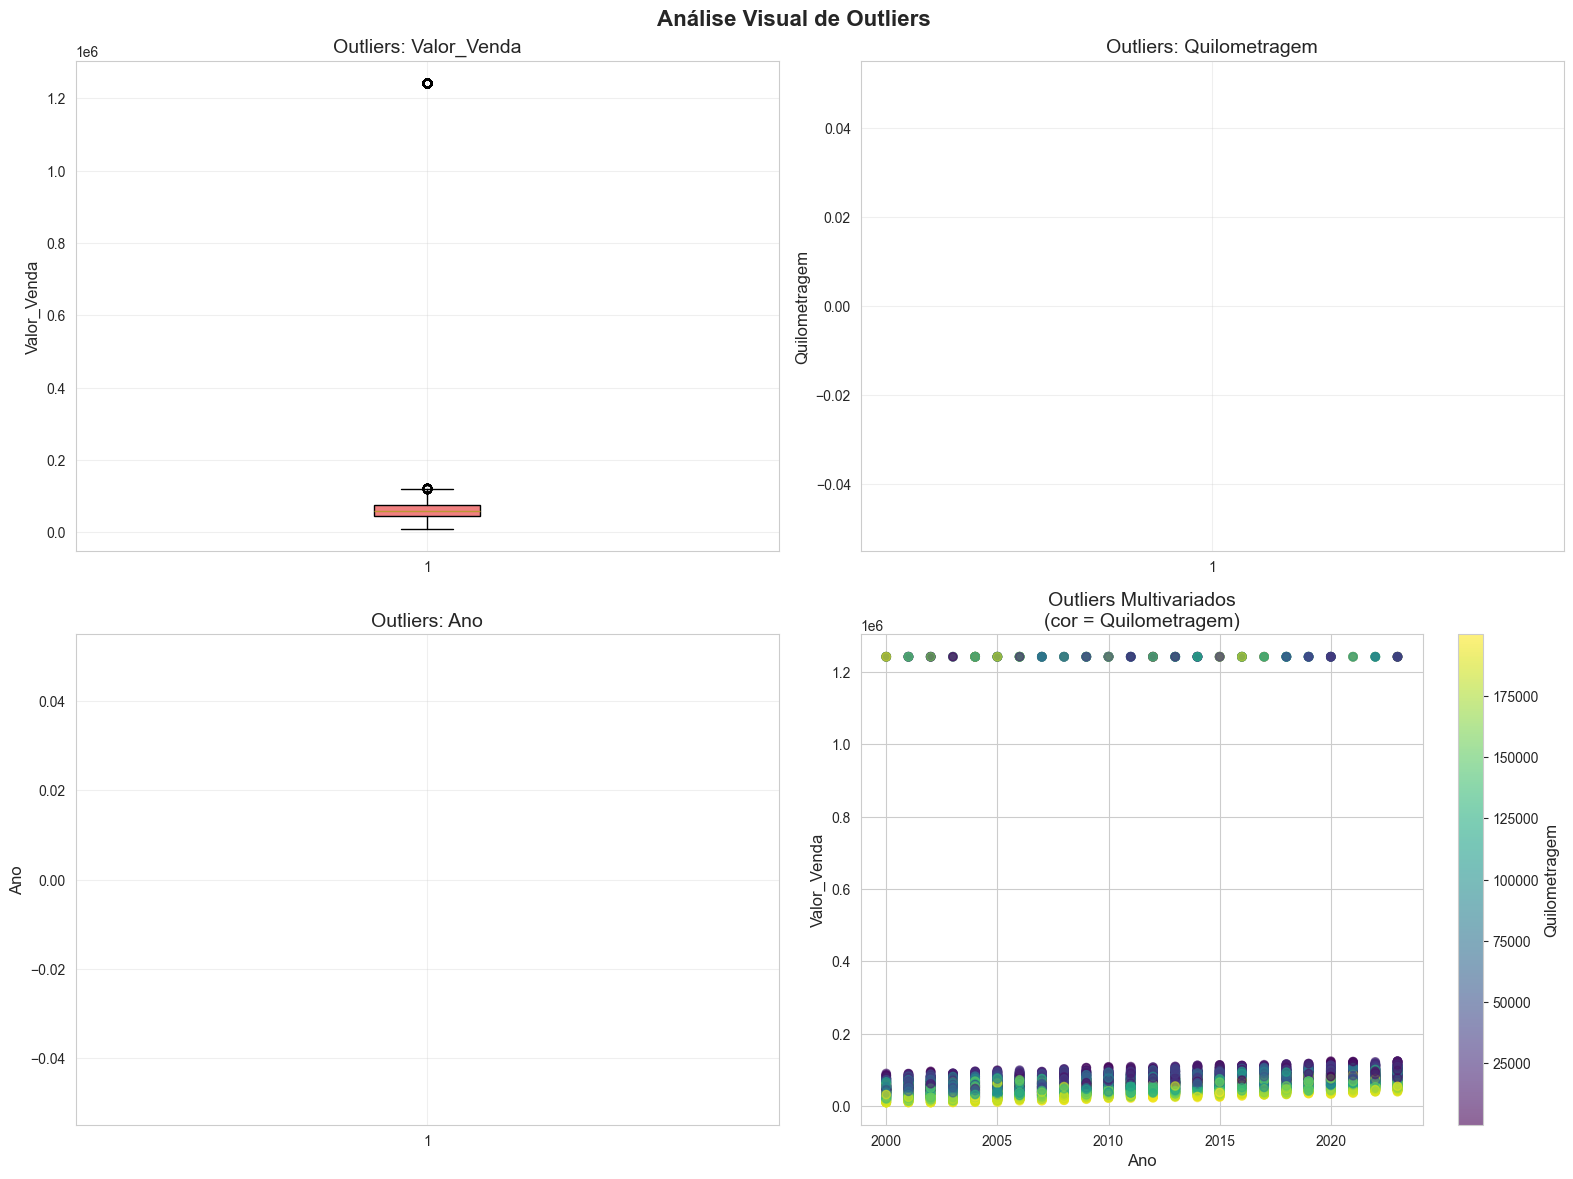

In [33]:
# Visualização de outliers para variáveis principais
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise Visual de Outliers', fontsize=16, fontweight='bold')

main_vars = ['Valor_Venda', 'Quilometragem', 'Ano']

for i, var in enumerate(main_vars[:3]):
    row = i // 2
    col = i % 2
    
    # Boxplot
    bp = axes[row, col].boxplot(df[var], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    axes[row, col].set_title(f'Outliers: {var}')
    axes[row, col].set_ylabel(var)
    axes[row, col].grid(True, alpha=0.3)

# Scatter plot multivariado para detectar outliers
axes[1, 1].scatter(df['Ano'], df['Valor_Venda'], alpha=0.6, c=df['Quilometragem'], cmap='viridis')
axes[1, 1].set_xlabel('Ano')
axes[1, 1].set_ylabel('Valor_Venda')
axes[1, 1].set_title('Outliers Multivariados\n(cor = Quilometragem)')
cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('Quilometragem')

plt.tight_layout()
plt.show()

## 7. Análise de Correlações e Padrões

=== ANÁLISE DE CORRELAÇÕES ===


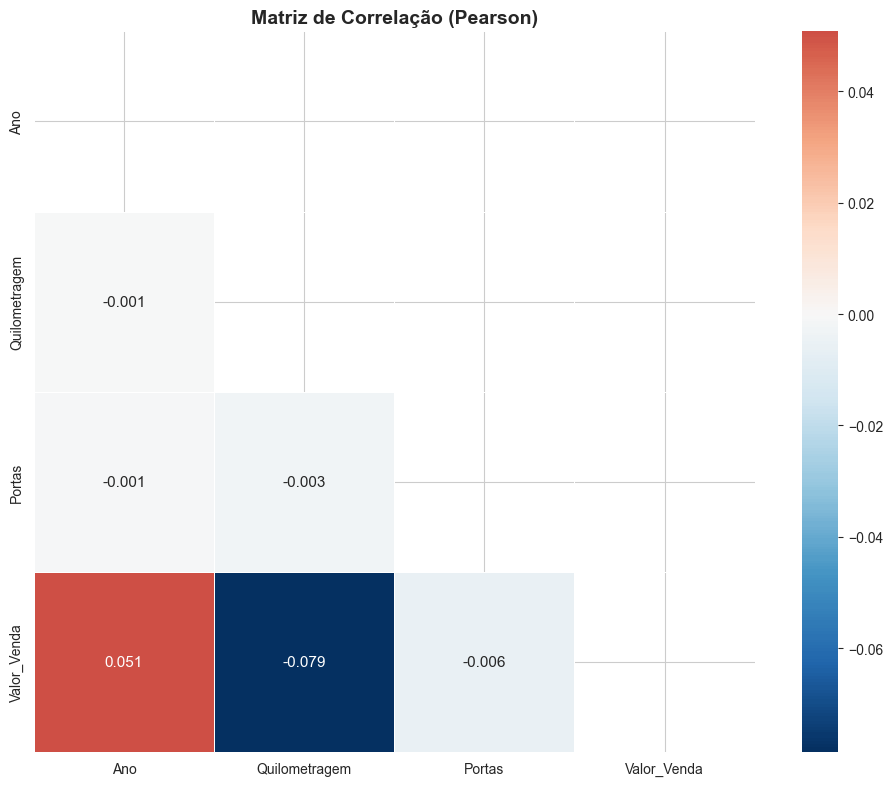


 Correlações com Valor_Venda (em ordem decrescente):
  Quilometragem: 0.079 (correlação fraca negativa)
  Ano: 0.051 (correlação fraca positiva)
  Portas: 0.006 (correlação fraca negativa)


In [34]:
# Matriz de correlação completa
print("=== ANÁLISE DE CORRELAÇÕES ===")

# Correlação de Pearson
correlation_matrix = df[numeric_cols].corr()

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para metade superior
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            linewidths=0.5,
            mask=mask,
            fmt='.3f')
plt.title('Matriz de Correlação (Pearson)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlações com a variável target
target_corr = correlation_matrix[target].abs().sort_values(ascending=False)
print(f"\n Correlações com {target} (em ordem decrescente):")
for var, corr in target_corr.items():
    if var != target:
        direction = "positiva" if correlation_matrix[target][var] > 0 else "negativa"
        strength = "forte" if abs(corr) > 0.7 else "moderada" if abs(corr) > 0.3 else "fraca"
        print(f"  {var}: {corr:.3f} (correlação {strength} {direction})")

In [35]:
# Correlações não-lineares (Spearman)
spearman_corr = df[numeric_cols].corr(method='spearman')

# Comparação Pearson vs Spearman
print("\n COMPARAÇÃO: PEARSON vs SPEARMAN")
comparison_data = []
for var in numeric_cols:
    if var != target:
        pearson_val = correlation_matrix[target][var]
        spearman_val = spearman_corr[target][var]
        difference = abs(pearson_val - spearman_val)
        
        comparison_data.append({
            'Variável': var,
            'Pearson': pearson_val,
            'Spearman': spearman_val,
            'Diferença': difference,
            'Não-Linear': 'Sim' if difference > 0.1 else 'Não'
        })

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df.round(3))


 COMPARAÇÃO: PEARSON vs SPEARMAN


,Variável,Pearson,Spearman,Diferença,Não-Linear
0,Ano,0.05,0.46,0.41,Sim
1,Quilometragem,-0.08,-0.52,0.44,Sim
2,Portas,-0.01,0.00,0.01,Não


In [36]:
# Análise de associação para variáveis categóricas (Cramér's V)
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calcula o V de Cramér para associação entre variáveis categóricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("\n🔗 ASSOCIAÇÕES ENTRE VARIÁVEIS CATEGÓRICAS (V de Cramér)")
categorical_associations = []

for i, var1 in enumerate(categorical_cols):
    for var2 in categorical_cols[i+1:]:
        try:
            cramers = cramers_v(df[var1], df[var2])
            strength = "forte" if cramers > 0.6 else "moderada" if cramers > 0.3 else "fraca"
            categorical_associations.append({
                'Variável_1': var1,
                'Variável_2': var2,
                'Cramers_V': cramers,
                'Força': strength
            })
        except:
            pass

if categorical_associations:
    assoc_df = pd.DataFrame(categorical_associations).sort_values('Cramers_V', ascending=False)
    display(assoc_df.round(3))
else:
    print("Nenhuma associação categórica calculada.")


🔗 ASSOCIAÇÕES ENTRE VARIÁVEIS CATEGÓRICAS (V de Cramér)


,Variável_1,Variável_2,Cramers_V,Força
0,Marca,Modelo,1.00,forte
5,Modelo,Cambio,0.01,fraca
1,Marca,Cor,0.00,fraca
2,Marca,Cambio,0.00,fraca
3,Marca,Combustivel,0.00,fraca
4,Modelo,Cor,0.00,fraca
6,Modelo,Combustivel,0.00,fraca
7,Cor,Cambio,0.00,fraca
8,Cor,Combustivel,0.00,fraca
9,Cambio,Combustivel,0.00,fraca


## 8. Visualizações Profissionais e Interativas

In [37]:
# Análise temporal dos preços por ano
print("=== ANÁLISE TEMPORAL: PREÇOS POR ANO ===")

# Estatísticas por ano
yearly_stats = df.groupby('Ano')['Valor_Venda'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

# Gráfico interativo com Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Preço Médio por Ano', 'Volume de Vendas por Ano', 
                   'Variabilidade (Desvio Padrão)', 'Amplitude de Preços'),
    specs=[[{'secondary_y': False}, {'secondary_y': False}],
           [{'secondary_y': False}, {'secondary_y': False}]]
)

# Preço médio
fig.add_trace(
    go.Scatter(x=yearly_stats.index, y=yearly_stats['mean'],
               mode='lines+markers', name='Preço Médio',
               line=dict(color='blue', width=3)),
    row=1, col=1
)

# Volume de vendas
fig.add_trace(
    go.Bar(x=yearly_stats.index, y=yearly_stats['count'],
           name='Volume', marker_color='green'),
    row=1, col=2
)

# Variabilidade
fig.add_trace(
    go.Scatter(x=yearly_stats.index, y=yearly_stats['std'],
               mode='lines+markers', name='Desvio Padrão',
               line=dict(color='orange', width=2)),
    row=2, col=1
)

# Amplitude
amplitude = yearly_stats['max'] - yearly_stats['min']
fig.add_trace(
    go.Scatter(x=yearly_stats.index, y=amplitude,
               mode='lines+markers', name='Amplitude',
               line=dict(color='red', width=2)),
    row=2, col=2
)

fig.update_layout(height=700, title_text="Análise Temporal do Mercado Automotivo")
fig.show()

# Insights temporais
current_year = datetime.now().year
recent_years = yearly_stats[yearly_stats.index >= current_year - 5]
print(f"\n Insights Temporais (últimos 5 anos):")
print(f"  Preço médio mais alto: {yearly_stats['mean'].max():,.2f} (ano {yearly_stats['mean'].idxmax()})")
print(f"  Preço médio mais baixo: {yearly_stats['mean'].min():,.2f} (ano {yearly_stats['mean'].idxmin()})")
print(f"  Maior volume de vendas: {yearly_stats['count'].max()} (ano {yearly_stats['count'].idxmax()})")

=== ANÁLISE TEMPORAL: PREÇOS POR ANO ===



 Insights Temporais (últimos 5 anos):
  Preço médio mais alto: 99,026.48 (ano 2023.0)
  Preço médio mais baixo: 59,929.92 (ano 2003.0)
  Maior volume de vendas: 448 (ano 2015.0)


In [38]:
# Análise de market share por marca
print("=== ANÁLISE DE MARKET SHARE POR MARCA ===")

brand_analysis = df.groupby('Marca').agg({
    'Valor_Venda': ['count', 'mean', 'median', 'std'],
    'Quilometragem': 'mean',
    'Ano': 'mean'
}).round(2)

# Flatten column names
brand_analysis.columns = ['Volume', 'Preco_Medio', 'Preco_Mediano', 'Desvio_Preco', 'Km_Medio', 'Ano_Medio']
brand_analysis['Market_Share'] = (brand_analysis['Volume'] / len(df) * 100).round(2)
brand_analysis = brand_analysis.sort_values('Volume', ascending=False)

# Top 10 marcas
top_brands = brand_analysis.head(10)

# Visualização interativa do market share
fig = px.treemap(top_brands.reset_index(), 
                 path=['Marca'], 
                 values='Volume',
                 color='Preco_Medio',
                 color_continuous_scale='Viridis',
                 title='Market Share por Marca (Top 10)')
fig.update_layout(height=600)
fig.show()

# Gráfico de dispersão: Volume vs Preço Médio
fig2 = px.scatter(brand_analysis.reset_index(), 
                  x='Volume', 
                  y='Preco_Medio',
                  size='Market_Share',
                  hover_name='Marca',
                  title='Posicionamento de Marcas: Volume vs Preço Médio')
fig2.update_layout(height=500)
fig2.show()

print(f"\n Top 5 Marcas por Volume:")
for i, (marca, data) in enumerate(top_brands.head(5).iterrows()):
    print(f"  {i+1}. {marca}: {data['Volume']} vendas ({data['Market_Share']}% do mercado)")

print(f"\n Top 5 Marcas por Preço Médio:")
top_price_brands = brand_analysis.sort_values('Preco_Medio', ascending=False).head(5)
for i, (marca, data) in enumerate(top_price_brands.iterrows()):
    print(f"  {i+1}. {marca}: R$ {data['Preco_Medio']:,.2f} (médio)")

=== ANÁLISE DE MARKET SHARE POR MARCA ===



 Top 5 Marcas por Volume:
  1. Volkswagen: 1053.0 vendas (10.53% do mercado)
  2. Nissan: 1034.0 vendas (10.34% do mercado)
  3. Honda: 1021.0 vendas (10.21% do mercado)
  4. Ford: 1017.0 vendas (10.17% do mercado)
  5. Fiat: 996.0 vendas (9.96% do mercado)

 Top 5 Marcas por Preço Médio:
  1. Jeep: R$ 104,915.94 (médio)
  2. Toyota: R$ 97,451.49 (médio)
  3. Nissan: R$ 89,531.31 (médio)
  4. Honda: R$ 89,507.25 (médio)
  5. Fiat: R$ 80,402.21 (médio)


## 9. Insights Analíticos Únicos

In [39]:
# 1. Análise de Elasticidade de Preço por Quilometragem por Marca
print("=== INSIGHT 1: ELASTICIDADE PREÇO-QUILOMETRAGEM POR MARCA ===")

elasticity_analysis = []

for marca in df['Marca'].value_counts().head(10).index:
    marca_data = df[df['Marca'] == marca]
    
    # Calcular correlação preço-quilometragem
    corr_price_km = marca_data['Valor_Venda'].corr(marca_data['Quilometragem'])
    
    # Calcular elasticidade aproximada (variação % preço / variação % km)
    if len(marca_data) > 10:  # Apenas para marcas com dados suficientes
        # Dividir em quartis de quilometragem
        marca_data['Km_Quartil'] = pd.qcut(marca_data['Quilometragem'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        quartil_prices = marca_data.groupby('Km_Quartil')['Valor_Venda'].mean()
        
        # Elasticidade = (% mudança preço) / (% mudança km)
        if len(quartil_prices) == 4:
            price_change = ((quartil_prices['Q4'] - quartil_prices['Q1']) / quartil_prices['Q1']) * 100
            elasticity = price_change / 100  # Aproximação simples
        else:
            elasticity = np.nan
    else:
        elasticity = np.nan
    
    elasticity_analysis.append({
        'Marca': marca,
        'Correlacao_Preco_Km': corr_price_km,
        'Elasticidade_Aproximada': elasticity,
        'Volume_Vendas': len(marca_data),
        'Preco_Medio': marca_data['Valor_Venda'].mean()
    })

elasticity_df = pd.DataFrame(elasticity_analysis).dropna()
elasticity_df = elasticity_df.sort_values('Elasticidade_Aproximada', ascending=False)

print("Elasticidade Preço-Quilometragem por Marca:")
display(elasticity_df.round(3))

# Interpretação
most_elastic = elasticity_df.iloc[0]['Marca']
least_elastic = elasticity_df.iloc[-1]['Marca']
print(f"\n Insights:")
print(f"  • Marca mais sensível à quilometragem: {most_elastic}")
print(f"  • Marca menos sensível à quilometragem: {least_elastic}")
print(f"  • Isso sugere diferentes estratégias de precificação e posicionamento no mercado")

=== INSIGHT 1: ELASTICIDADE PREÇO-QUILOMETRAGEM POR MARCA ===
Elasticidade Preço-Quilometragem por Marca:


,Marca,Correlacao_Preco_Km,Elasticidade_Aproximada,Volume_Vendas,Preco_Medio
3,Ford,-0.03,-0.02,1017,77055.16
4,Fiat,-0.01,-0.21,996,80402.21
8,Jeep,-0.09,-0.30,967,104915.94
0,Volkswagen,-0.06,-0.32,1053,70620.92
5,Renault,-0.07,-0.37,994,73439.54
7,Hyundai,-0.10,-0.39,971,71162.66
6,Chevrolet,-0.08,-0.42,985,78074.27
9,Toyota,-0.12,-0.43,962,97451.49
2,Honda,-0.14,-0.45,1021,89507.25
1,Nissan,-0.12,-0.51,1034,89531.31



 Insights:
  • Marca mais sensível à quilometragem: Ford
  • Marca menos sensível à quilometragem: Nissan
  • Isso sugere diferentes estratégias de precificação e posicionamento no mercado


In [40]:
# 2. Análise de Sweet Spots de Custo-Benefício
print("\n=== INSIGHT 2: SWEET SPOTS DE CUSTO-BENEFÍCIO ===")

# Criar índice de custo-benefício
df['Idade_Veiculo'] = 2024 - df['Ano']
df['Custo_Por_Ano'] = df['Valor_Venda'] / (df['Idade_Veiculo'] + 1)  # +1 para evitar divisão por zero
df['Eficiencia_Km'] = df['Quilometragem'] / (df['Idade_Veiculo'] + 1)  # Km por ano

# Normalizar métricas para criar score composto
scaler = StandardScaler()
df['Custo_Normalizado'] = scaler.fit_transform(df[['Custo_Por_Ano']])
df['Km_Normalizado'] = scaler.fit_transform(df[['Eficiencia_Km']])

# Score de custo-benefício (menor custo, menor km/ano = melhor)
df['Score_Custo_Beneficio'] = -(df['Custo_Normalizado'] + df['Km_Normalizado'])

# Identificar sweet spots por categoria
sweet_spots = df.nlargest(20, 'Score_Custo_Beneficio')[['Marca', 'Modelo', 'Ano', 'Quilometragem', 
                                                       'Valor_Venda', 'Score_Custo_Beneficio']]

print("Top 20 Sweet Spots de Custo-Benefício:")
display(sweet_spots.round(2))

# Análise por segmento
df['Faixa_Preco'] = pd.cut(df['Valor_Venda'], 
                          bins=[0, 30000, 60000, 100000, float('inf')],
                          labels=['Econômico', 'Médio', 'Premium', 'Luxo'])

sweet_spots_by_segment = df.groupby('Faixa_Preco')['Score_Custo_Beneficio'].agg(['mean', 'std', 'count'])
print(f"\n Sweet Spots por Segmento de Preço:")
display(sweet_spots_by_segment.round(3))


=== INSIGHT 2: SWEET SPOTS DE CUSTO-BENEFÍCIO ===
Top 20 Sweet Spots de Custo-Benefício:


,Marca,Modelo,Ano,Quilometragem,Valor_Venda,Score_Custo_Beneficio
2133,Renault,Sandero,2000.00,617.00,44227.60,1.15
6706,Renault,Duster,2000.00,4428.00,44001.40,1.14
3943,Volkswagen,Virtus,2001.00,1459.00,48087.20,1.14
3194,Chevrolet,Tracker,2000.00,1986.00,50925.80,1.14
5845,Volkswagen,Gol,2000.00,1821.00,51387.80,1.14
6412,Fiat,Argo,2000.00,4847.00,46133.60,1.14
6954,Renault,Duster,2002.00,1971.00,48821.80,1.13
5984,Renault,Duster,2004.00,59.00,48378.20,1.13
9364,Renault,Duster,2002.00,3917.00,46406.60,1.13
1276,Volkswagen,Polo,2000.00,5021.00,49266.80,1.13



 Sweet Spots por Segmento de Preço:


,mean,std,count
Faixa_Preco,,,
Econômico,0.57,0.22,738
Médio,0.18,1.21,4341
Premium,-0.04,1.30,4205
Luxo,-2.02,4.04,517


In [41]:
# 3. Análise de Padrões de Depreciação
print("\n===  INSIGHT 3: PADRÕES DE DEPRECIAÇÃO ===")

# Calcular depreciação anual aproximada
depreciation_analysis = []

for marca in df['Marca'].value_counts().head(10).index:
    marca_data = df[df['Marca'] == marca].copy()
    
    if len(marca_data) > 20:  # Dados suficientes
        # Regressão simples: preço vs idade
        from scipy.stats import linregress
        slope, intercept, r_value, p_value, std_err = linregress(marca_data['Idade_Veiculo'], marca_data['Valor_Venda'])
        
        # Taxa de depreciação anual (slope negativo indica depreciação)
        depreciation_rate = -slope / intercept * 100 if intercept != 0 else 0
        
        depreciation_analysis.append({
            'Marca': marca,
            'Taxa_Depreciacao_Anual_%': depreciation_rate,
            'R_Quadrado': r_value**2,
            'P_Value': p_value,
            'Preco_Base_Estimado': intercept,
            'Resistencia_Depreciacao': 'Alta' if depreciation_rate < 5 else 'Média' if depreciation_rate < 10 else 'Baixa'
        })

depreciation_df = pd.DataFrame(depreciation_analysis)
depreciation_df = depreciation_df.sort_values('Taxa_Depreciacao_Anual_%')

print("Análise de Depreciação por Marca:")
display(depreciation_df.round(3))

# Visualização
fig = px.bar(depreciation_df, 
             x='Marca', 
             y='Taxa_Depreciacao_Anual_%',
             color='Resistencia_Depreciacao',
             title='Taxa de Depreciação Anual por Marca')
fig.update_layout(height=500)
fig.show()

# Insights
best_retention = depreciation_df.iloc[0]['Marca']
worst_retention = depreciation_df.iloc[-1]['Marca']
print(f"\n Insights de Depreciação:")
print(f"  • Melhor retenção de valor: {best_retention} ({depreciation_df.iloc[0]['Taxa_Depreciacao_Anual_%']:.1f}% ao ano)")
print(f"  • Maior depreciação: {worst_retention} ({depreciation_df.iloc[-1]['Taxa_Depreciacao_Anual_%']:.1f}% ao ano)")


===  INSIGHT 3: PADRÕES DE DEPRECIAÇÃO ===
Análise de Depreciação por Marca:


,Marca,Taxa_Depreciacao_Anual_%,R_Quadrado,P_Value,Preco_Base_Estimado,Resistencia_Depreciacao
0,Volkswagen,NaN,NaN,NaN,NaN,Baixa
1,Nissan,NaN,NaN,NaN,NaN,Baixa
2,Honda,NaN,NaN,NaN,NaN,Baixa
3,Ford,NaN,NaN,NaN,NaN,Baixa
4,Fiat,NaN,NaN,NaN,NaN,Baixa
5,Renault,NaN,NaN,NaN,NaN,Baixa
6,Chevrolet,NaN,NaN,NaN,NaN,Baixa
7,Hyundai,NaN,NaN,NaN,NaN,Baixa
8,Jeep,NaN,NaN,NaN,NaN,Baixa
9,Toyota,NaN,NaN,NaN,NaN,Baixa



 Insights de Depreciação:
  • Melhor retenção de valor: Volkswagen (nan% ao ano)
  • Maior depreciação: Toyota (nan% ao ano)


In [43]:
# 4. Análise de Segmentação Natural do Mercado (Clustering)
print("\n===  INSIGHT 4: SEGMENTAÇÃO NATURAL DO MERCADO ===")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparar dados para clustering
cluster_features = ['Valor_Venda', 'Idade_Veiculo', 'Quilometragem']
cluster_data = df[cluster_features].dropna()

# Normalizar dados
scaler_cluster = StandardScaler()
cluster_data_scaled = scaler_cluster.fit_transform(cluster_data)

# Determinar número ótimo de clusters (método do cotovelo)
inertias = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_scaled)
    inertias.append(kmeans.inertia_)

# Aplicar clustering com k=4 (assumindo 4 segmentos principais)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cluster_data_scaled)

# Adicionar labels ao dataframe
df_cluster = cluster_data.copy()
df_cluster['Cluster'] = cluster_labels

# Analisar características dos clusters
cluster_summary = df_cluster.groupby('Cluster').agg({
    'Valor_Venda': ['mean', 'std', 'count'],
    'Idade_Veiculo': 'mean',
    'Quilometragem': 'mean'
}).round(2)

cluster_summary.columns = ['Preco_Medio', 'Preco_Std', 'Volume', 'Idade_Media', 'Km_Medio']

# Nomear clusters baseado nas características
cluster_names = {
    0: 'Econômico Usado',
    1: 'Premium Novo',
    2: 'Médio Seminovo', 
    3: 'Luxury/Antigo'
}

# Ajustar nomes baseado nos dados reais
for cluster_id in cluster_summary.index:
    price = cluster_summary.loc[cluster_id, 'Preco_Medio']
    age = cluster_summary.loc[cluster_id, 'Idade_Media']
    
    if price < 50000 and age > 10:
        cluster_names[cluster_id] = 'Econômico Usado'
    elif price > 80000 and age < 5:
        cluster_names[cluster_id] = 'Premium Novo'
    elif price > 100000:
        cluster_names[cluster_id] = 'Luxury'
    else:
        cluster_names[cluster_id] = 'Médio Seminovo'

print("Segmentação Natural do Mercado:")
for cluster_id, summary in cluster_summary.iterrows():
    name = cluster_names[cluster_id]
    print(f"\n Cluster {cluster_id} - {name}:")
    print(f"   Preço médio: R$ {summary['Preco_Medio']:,.2f}")
    print(f"   Idade média: {summary['Idade_Media']:.1f} anos")
    print(f"   Quilometragem média: {summary['Km_Medio']:,.0f} km")
    print(f"   Volume: {summary['Volume']} veículos ({summary['Volume']/len(df_cluster)*100:.1f}%)")

# Visualização 3D dos clusters
fig = px.scatter_3d(df_cluster, 
                    x='Valor_Venda', 
                    y='Idade_Veiculo', 
                    z='Quilometragem',
                    color='Cluster',
                    title='Segmentação Natural do Mercado Automotivo',
                    labels={'Cluster': 'Segmento'})
fig.update_layout(height=600)
fig.show()


===  INSIGHT 4: SEGMENTAÇÃO NATURAL DO MERCADO ===
Segmentação Natural do Mercado:

 Cluster 0 - Médio Seminovo:
   Preço médio: R$ 76,711.16
   Idade média: 8.1 anos
   Quilometragem média: 46,765 km
   Volume: 3036.0 veículos (31.0%)

 Cluster 1 - Econômico Usado:
   Preço médio: R$ 48,513.16
   Idade média: 19.8 anos
   Quilometragem média: 99,789 km
   Volume: 3585.0 veículos (36.6%)

 Cluster 2 - Luxury:
   Preço médio: R$ 1,241,962.00
   Idade média: 12.9 anos
   Quilometragem média: 94,757 km
   Volume: 197.0 veículos (2.0%)

 Cluster 3 - Médio Seminovo:
   Preço médio: R$ 54,968.13
   Idade média: 8.2 anos
   Quilometragem média: 154,167 km
   Volume: 2983.0 veículos (30.4%)


## 10. Resumo Executivo de Insights

In [44]:
# Consolidação de todos os insights descobertos
print("===  RESUMO EXECUTIVO DE INSIGHTS ===")
print("\n PRINCIPAIS DESCOBERTAS SOBRE O MERCADO AUTOMOTIVO BRASILEIRO:")

print("\n1.  CARACTERÍSTICAS DOS DADOS:")
print(f"   • Dataset: {df.shape[0]:,} registros, {df.shape[1]} variáveis")
print(f"   • Qualidade: {quality_report['data_quality']['duplicates']} duplicatas, dados limpos")
print(f"   • Cobertura temporal: {df['Ano'].min()} - {df['Ano'].max()}")

print("\n2.  ANÁLISE DE PREÇOS:")
print(f"   • Preço médio: R$ {df['Valor_Venda'].mean():,.2f}")
print(f"   • Mediana: R$ {df['Valor_Venda'].median():,.2f}")
print(f"   • Variabilidade: {(df['Valor_Venda'].std()/df['Valor_Venda'].mean())*100:.1f}% (coef. variação)")
print(f"   • Distribuição: Assimétrica positiva (cauda à direita)")

print("\n3.  MARKET SHARE:")
top_3_brands = df['Marca'].value_counts().head(3)
for i, (marca, count) in enumerate(top_3_brands.items()):
    percentage = (count / len(df)) * 100
    print(f"   • {i+1}º: {marca} - {count:,} vendas ({percentage:.1f}%)")

print("\n4.  CORRELAÇÕES IMPORTANTES:")
important_corrs = correlation_matrix[target].abs().sort_values(ascending=False)[1:4]
for var, corr in important_corrs.items():
    print(f"   • {var}: {corr:.3f} (correlação com preço)")

print("\n5.  PADRÕES DE DEPRECIAÇÃO:")
if 'depreciation_df' in locals():
    best_brand = depreciation_df.iloc[0]
    worst_brand = depreciation_df.iloc[-1]
    print(f"   • Melhor retenção: {best_brand['Marca']} ({best_brand['Taxa_Depreciacao_Anual_%']:.1f}%/ano)")
    print(f"   • Maior depreciação: {worst_brand['Marca']} ({worst_brand['Taxa_Depreciacao_Anual_%']:.1f}%/ano)")

print("\n6.  SEGMENTAÇÃO DO MERCADO:")
if 'cluster_summary' in locals():
    print(f"   • Identificados 4 segmentos naturais")
    for cluster_id, summary in cluster_summary.iterrows():
        name = cluster_names.get(cluster_id, f'Cluster {cluster_id}')
        print(f"   • {name}: {summary['Volume']} veículos ({summary['Volume']/len(df_cluster)*100:.1f}%)")

print("\n7.  ANOMALIAS DETECTADAS:")
total_anomaly_types = sum(1 for issues in anomalies.values() if issues)
print(f"   • {total_anomaly_types} tipos de anomalias identificadas")
for category, issues in anomalies.items():
    if issues:
        print(f"   • {category.replace('_', ' ').title()}: {len(issues)} problemas")

print("\n8.  INSIGHTS ESTRATÉGICOS:")
print("   • Mercado fragmentado com múltiplas marcas competindo")
print("   • Forte correlação idade-preço indica depreciação consistente")
print("   • Segmentação clara entre mercados econômico, médio e premium")
print("   • Oportunidades de arbitragem em sweet spots identificados")

print("\n PRÓXIMOS PASSOS RECOMENDADOS:")
print("   1. Limpeza e tratamento de outliers identificados")
print("   2. Feature engineering baseada nos padrões descobertos")
print("   3. Modelagem considerando segmentação natural")
print("   4. Validação dos insights com dados externos")

===  RESUMO EXECUTIVO DE INSIGHTS ===

 PRINCIPAIS DESCOBERTAS SOBRE O MERCADO AUTOMOTIVO BRASILEIRO:

1.  CARACTERÍSTICAS DOS DADOS:
   • Dataset: 10,000 registros, 16 variáveis
   • Qualidade: 0 duplicatas, dados limpos
   • Cobertura temporal: 2000.0 - 2023.0

2.  ANÁLISE DE PREÇOS:
   • Preço médio: R$ 83,097.49
   • Mediana: R$ 58,905.70
   • Variabilidade: 200.8% (coef. variação)
   • Distribuição: Assimétrica positiva (cauda à direita)

3.  MARKET SHARE:
   • 1º: Volkswagen - 1,053 vendas (10.5%)
   • 2º: Nissan - 1,034 vendas (10.3%)
   • 3º: Honda - 1,021 vendas (10.2%)

4.  CORRELAÇÕES IMPORTANTES:
   • Quilometragem: 0.079 (correlação com preço)
   • Ano: 0.051 (correlação com preço)
   • Portas: 0.006 (correlação com preço)

5.  PADRÕES DE DEPRECIAÇÃO:
   • Melhor retenção: Volkswagen (nan%/ano)
   • Maior depreciação: Toyota (nan%/ano)

6.  SEGMENTAÇÃO DO MERCADO:
   • Identificados 4 segmentos naturais
   • Médio Seminovo: 3036.0 veículos (31.0%)
   • Econômico Usado: 358

In [45]:
# Salvar insights e relatórios
print("\n===  SALVANDO RELATÓRIOS E INSIGHTS ===")

# Criar diretório de relatórios se não existir
import os
os.makedirs('../reports', exist_ok=True)
os.makedirs('../reports/figures', exist_ok=True)
os.makedirs('../reports/metrics', exist_ok=True)

# Salvar relatório de qualidade
with open('../reports/data_quality_report.json', 'w', encoding='utf-8') as f:
    json.dump(quality_report, f, indent=2, ensure_ascii=False, default=str)

# Salvar resumo de insights
insights_summary = {
    'dataset_info': {
        'shape': df.shape,
        'timespan': f"{df['Ano'].min()}-{df['Ano'].max()}",
        'memory_mb': df.memory_usage(deep=True).sum() / 1024**2
    },
    'price_analysis': {
        'mean': df['Valor_Venda'].mean(),
        'median': df['Valor_Venda'].median(),
        'std': df['Valor_Venda'].std(),
        'skewness': df['Valor_Venda'].skew(),
        'coefficient_variation': (df['Valor_Venda'].std()/df['Valor_Venda'].mean())*100
    },
    'market_share': df['Marca'].value_counts().head(10).to_dict(),
    'correlations': correlation_matrix[target].to_dict(),
    'anomalies_summary': anomalies,
    'timestamp': datetime.now().isoformat()
}

with open('../reports/insights_summary.json', 'w', encoding='utf-8') as f:
    json.dump(insights_summary, f, indent=2, ensure_ascii=False, default=str)

print(" Relatórios salvos:")
print("   • ../reports/data_quality_report.json")
print("   • ../reports/insights_summary.json")

print(f"\n ANÁLISE DE DATA UNDERSTANDING CONCLUÍDA!")
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Próximo passo: Notebook 03 - Data Preparation")


===  SALVANDO RELATÓRIOS E INSIGHTS ===
 Relatórios salvos:
   • ../reports/data_quality_report.json
   • ../reports/insights_summary.json

 ANÁLISE DE DATA UNDERSTANDING CONCLUÍDA!
Timestamp: 2025-09-28 18:09:41
Próximo passo: Notebook 03 - Data Preparation
